In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [2]:
# read in the data with the headers beginning at line 2

dataframe = pd.read_csv('/Users/tinashem/LinkedIn Account Data/Basic_LinkedInDataExport_05-09-2024/Connections.csv', header=2)
dataframe.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Matteo,Sollecito,https://www.linkedin.com/in/matteo-sollecito,NaN,Great Britain Baseball,Baseball Player,06 May 2024
1,Jonah,Pacis,https://www.linkedin.com/in/jonahpacis,NaN,Swarthmore College,Systems Toxicology & Neuroethology Research As...,06 May 2024
2,Kendall,Davis,https://www.linkedin.com/in/kendallrdavis,NaN,AT&T,Lead Manager: Media Reporting & Analytics (Mar...,30 Apr 2024
3,Tadiwa,Takawira,https://www.linkedin.com/in/tadiwanashetakawira,NaN,NaN,NaN,27 Apr 2024
4,Regina,Lloyd,https://www.linkedin.com/in/regina-lloyd-298a30b,NaN,Hopeloft,Bookkeeper and Payroll Specialist,23 Apr 2024


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     525 non-null    object
 1   Last Name      525 non-null    object
 2   URL            525 non-null    object
 3   Email Address  6 non-null      object
 4   Company        498 non-null    object
 5   Position       499 non-null    object
 6   Connected On   529 non-null    object
dtypes: object(7)
memory usage: 29.1+ KB


In [4]:
# It appears that there are missing values in the dataset. Let's check the number of missing values in the First Name column.
dataframe[dataframe['First Name'].isnull()].head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
191,NaN,NaN,NaN,NaN,NaN,NaN,27 Jun 2023
406,NaN,NaN,NaN,NaN,NaN,NaN,01 Apr 2022
445,NaN,NaN,NaN,NaN,NaN,NaN,19 Oct 2020
494,NaN,NaN,NaN,NaN,NaN,NaN,04 Jul 2020


In [5]:
# These are likely deleted accounts. Let's remove these empty cells from the dataset to clean it up and show the changes again
dataframe.drop([191,406,445,494], axis=0, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 528
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     525 non-null    object
 1   Last Name      525 non-null    object
 2   URL            525 non-null    object
 3   Email Address  6 non-null      object
 4   Company        498 non-null    object
 5   Position       499 non-null    object
 6   Connected On   525 non-null    object
dtypes: object(7)
memory usage: 32.8+ KB


In [6]:
# Let's check what the index is for the dataframe
dataframe.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528],
      dtype='int64', length=525)

In [7]:
# Let's reset the index to accordingly respond to the changes made by the deleted cells
dataframe.reset_index(inplace=True)

In [8]:
# Inspect the index again
dataframe.index

RangeIndex(start=0, stop=525, step=1)

In [9]:
# Let's see what the data type is for the "Connected On" column, which should show the date the connection was made
type(dataframe['Connected On'].values[0])

str

In [10]:
# let's see what the first value in the "Connected On" column looks like
dataframe['Connected On'].values[0]

'06 May 2024'

In [11]:
# change the format of the Connected On column to datetime for easier analysis of time-series data
dataframe['Connected On'] = [datetime.strptime(x, '%d %b %Y') for x in dataframe['Connected On']]

In [12]:
# Inspect the dataframe again
dataframe.head()

,index,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,0,Matteo,Sollecito,https://www.linkedin.com/in/matteo-sollecito,NaN,Great Britain Baseball,Baseball Player,2024-05-06
1,1,Jonah,Pacis,https://www.linkedin.com/in/jonahpacis,NaN,Swarthmore College,Systems Toxicology & Neuroethology Research As...,2024-05-06
2,2,Kendall,Davis,https://www.linkedin.com/in/kendallrdavis,NaN,AT&T,Lead Manager: Media Reporting & Analytics (Mar...,2024-04-30
3,3,Tadiwa,Takawira,https://www.linkedin.com/in/tadiwanashetakawira,NaN,NaN,NaN,2024-04-27
4,4,Regina,Lloyd,https://www.linkedin.com/in/regina-lloyd-298a30b,NaN,Hopeloft,Bookkeeper and Payroll Specialist,2024-04-23


In [13]:
# Sort the dataframe by the dates in the "Connected On" column and inspect the dataset again
dataframe.sort_values(by='Connected On', inplace=True)
dataframe.head()

,index,First Name,Last Name,URL,Email Address,Company,Position,Connected On
524,528,Tafadzwa,Shoko,https://www.linkedin.com/in/tafadzwa-shoko-549...,NaN,Expleo Group,Test Engineer,2020-04-24
523,527,Ahmed,Girach,https://www.linkedin.com/in/ahmed-girach-01661...,NaN,Transurban,Senior Credit Officer,2020-04-24
521,525,Mwangangi,Kalii (MK),https://www.linkedin.com/in/haron-kalii,NaN,Analysis Group,Analyst,2020-05-22
522,526,James,Mackenzie,https://www.linkedin.com/in/jamesmackenziecrea...,NaN,Bulletproof,Creative Technologist & Anthropologist,2020-05-22
520,524,GERALD K,MUSANDIRIRE,https://www.linkedin.com/in/geraldkm,NaN,University of Central Lancashire,Campus Ambassador,2020-05-31


In [14]:
# Drop the index column that was created when the index was reset and inspect the dataset again
dataframe.drop('index', axis=1, inplace=True)
dataframe.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
524,Tafadzwa,Shoko,https://www.linkedin.com/in/tafadzwa-shoko-549...,NaN,Expleo Group,Test Engineer,2020-04-24
523,Ahmed,Girach,https://www.linkedin.com/in/ahmed-girach-01661...,NaN,Transurban,Senior Credit Officer,2020-04-24
521,Mwangangi,Kalii (MK),https://www.linkedin.com/in/haron-kalii,NaN,Analysis Group,Analyst,2020-05-22
522,James,Mackenzie,https://www.linkedin.com/in/jamesmackenziecrea...,NaN,Bulletproof,Creative Technologist & Anthropologist,2020-05-22
520,GERALD K,MUSANDIRIRE,https://www.linkedin.com/in/geraldkm,NaN,University of Central Lancashire,Campus Ambassador,2020-05-31


In [15]:
# Do another reset of the index after the sorting of the data, and inspect the dataset again
dataframe.reset_index(inplace=True)
dataframe.head()

,index,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,524,Tafadzwa,Shoko,https://www.linkedin.com/in/tafadzwa-shoko-549...,NaN,Expleo Group,Test Engineer,2020-04-24
1,523,Ahmed,Girach,https://www.linkedin.com/in/ahmed-girach-01661...,NaN,Transurban,Senior Credit Officer,2020-04-24
2,521,Mwangangi,Kalii (MK),https://www.linkedin.com/in/haron-kalii,NaN,Analysis Group,Analyst,2020-05-22
3,522,James,Mackenzie,https://www.linkedin.com/in/jamesmackenziecrea...,NaN,Bulletproof,Creative Technologist & Anthropologist,2020-05-22
4,520,GERALD K,MUSANDIRIRE,https://www.linkedin.com/in/geraldkm,NaN,University of Central Lancashire,Campus Ambassador,2020-05-31


In [16]:
# Drop the index column that was created when the index was reset and inspect the dataset again
dataframe.drop('index', axis=1, inplace=True)
dataframe.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Tafadzwa,Shoko,https://www.linkedin.com/in/tafadzwa-shoko-549...,NaN,Expleo Group,Test Engineer,2020-04-24
1,Ahmed,Girach,https://www.linkedin.com/in/ahmed-girach-01661...,NaN,Transurban,Senior Credit Officer,2020-04-24
2,Mwangangi,Kalii (MK),https://www.linkedin.com/in/haron-kalii,NaN,Analysis Group,Analyst,2020-05-22
3,James,Mackenzie,https://www.linkedin.com/in/jamesmackenziecrea...,NaN,Bulletproof,Creative Technologist & Anthropologist,2020-05-22
4,GERALD K,MUSANDIRIRE,https://www.linkedin.com/in/geraldkm,NaN,University of Central Lancashire,Campus Ambassador,2020-05-31


In [17]:
# Final reset of the index to drop the index column and ensure that the index is in order
dataframe.reset_index(drop=True, inplace=True)

In [18]:
# Inspect the columns in the dataset
dataframe.columns

Index(['First Name', 'Last Name', 'URL', 'Email Address', 'Company',
       'Position', 'Connected On'],
      dtype='object')

### Let's make a plot of the number of connections and how they have changed over time.

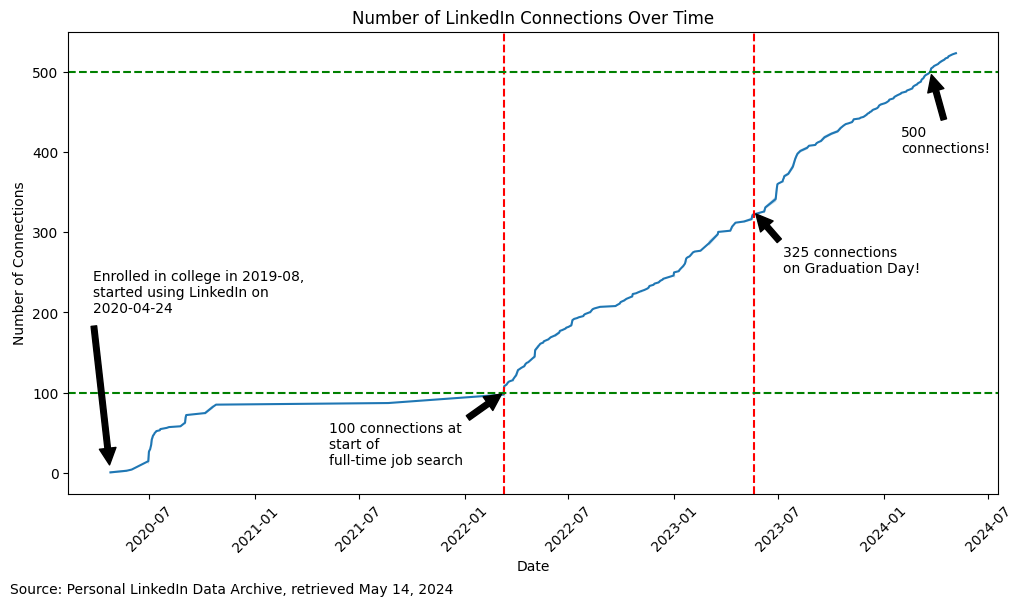

In [19]:
# let's plot a graph of the number of connections over time using the Matplotlib and Seaborn libraries
# We will use the object-oriented approach to create the plot
# Our plot will be a well-labeled line plot with a number of key annotations to show significant events in the data
# The x-axis will be the date the connection was made, and the y-axis will be the number of connections
# The annotations will be made using the ax.annotate() method, which will allow us to place text at specific points on the graph
# The plt.axvline() and plt.axhline() methods will be used to draw vertical and horizontal lines on the graph respectively
# The data source and the date of retrieval will be included in the graph as well

plt.figure(figsize=(12,6));
ax = sns.lineplot(x='Connected On', y=dataframe.index, data=dataframe);
ax.annotate('Enrolled in college in 2019-08,\nstarted using LinkedIn on\n2020-04-24', xy=(datetime(2020, 4, 24), 0), xytext=(datetime(2020, 3, 24), 200), arrowprops=dict(facecolor='black', shrink=0.05));
ax.annotate('100 connections at\nstart of\nfull-time job search', xy=(datetime(2022, 3, 10), 100), xytext=(datetime(2021, 5, 10), 10), arrowprops=dict(facecolor='black', shrink=0.05));
ax.annotate('325 connections\non Graduation Day!', xy=(datetime(2023, 5, 21), 325), xytext=(datetime(2023, 7, 10), 250), arrowprops=dict(facecolor='black', shrink=0.05));
ax.annotate('500\nconnections!', xy=(datetime(2024, 3, 23), 500), xytext=(datetime(2024, 1, 31), 400), arrowprops=dict(facecolor='black', shrink=0.05));
ax.annotate('Source: Personal LinkedIn Data Archive, retrieved May 14, 2024', xy=(datetime(2020, 4, 24), 0), xytext=(datetime(2019, 11, 1), -150), xycoords='data');
plt.title('Number of LinkedIn Connections Over Time');
plt.xlabel('Date');
plt.ylabel('Number of Connections');
plt.xticks(rotation=45);
plt.axvline(datetime(2022, 3, 10), color='r', linestyle='--');
plt.axvline(datetime(2023, 5, 21), color='r', linestyle='--');
plt.axhline(100, color='g', linestyle='--');
plt.axhline(500, color='g', linestyle='--');
plt.show();

In [20]:
# Let's investigate the top 10 companies that my connections work for
dataframe.groupby('Company').count().sort_values(by='First Name', ascending=False).head(10)

,First Name,Last Name,URL,Email Address,Position,Connected On
Company,,,,,,
Swarthmore College,100,100,100,0,100,100
Microsoft,7,7,7,0,7,7
Google,5,5,5,0,5,5
Amazon Web Services (AWS),4,4,4,0,4,4
AlphaSights,3,3,3,0,3,3
Busara,3,3,3,0,3,3
UBS,3,3,3,0,3,3
American Express,3,3,3,1,3,3
Morgan Stanley,3,3,3,0,3,3


In [21]:
# Let's investigate the number of unique companies that my connections work for
dataframe['Company'].nunique()

343

In [22]:
# Let's investigate the number of times each company appears in the "Company" column, indicating how many different people work at each company who are among my connections
dataframe['Company'].value_counts().head(10)

Company
Swarthmore College           100
Microsoft                      7
Google                         5
Amazon Web Services (AWS)      4
Goldman Sachs                  3
American Express               3
Amazon                         3
UBS                            3
AlphaSights                    3
Algorizin                      3
Name: count, dtype: int64

In [23]:
# Let's see how many connections were made each year
dataframe['Connected On'].dt.year.value_counts()

Connected On
2023    211
2022    162
2020     86
2024     64
2021      2
Name: count, dtype: int64